# Generating Synthetic data for 100 trials

This file goes over the process of generating a synthetic trial, your job is to replicate this process 100 times and store the results in json format on a text file for later processing.  Read the comments to get an idea about the missing code.



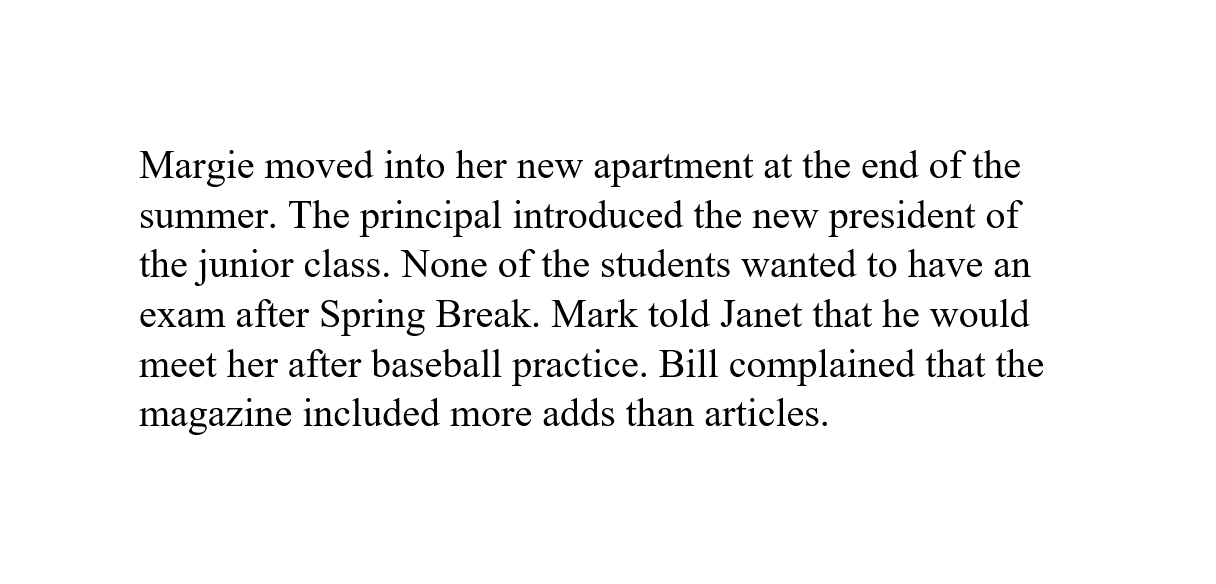

In [1]:
# just showing you the image of the text we will be using to generate fixations over

from IPython.display import Image

img = Image(filename='synthetic_text.png')
img

In [2]:
# yup, this is the same library we used last semester.  We call that foreshadowing :)

import emip_toolkit as EMTK

In [3]:
# generate areas of interest around each word, we will see a visualization of this in a second
import warnings
warnings.filterwarnings('ignore')

image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi.head()

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png


In [4]:
# we add the actual word associated with each area of interest (AOI)

file_path = "./"

aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png,Margie
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png,moved
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png,into
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png,her
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png,new


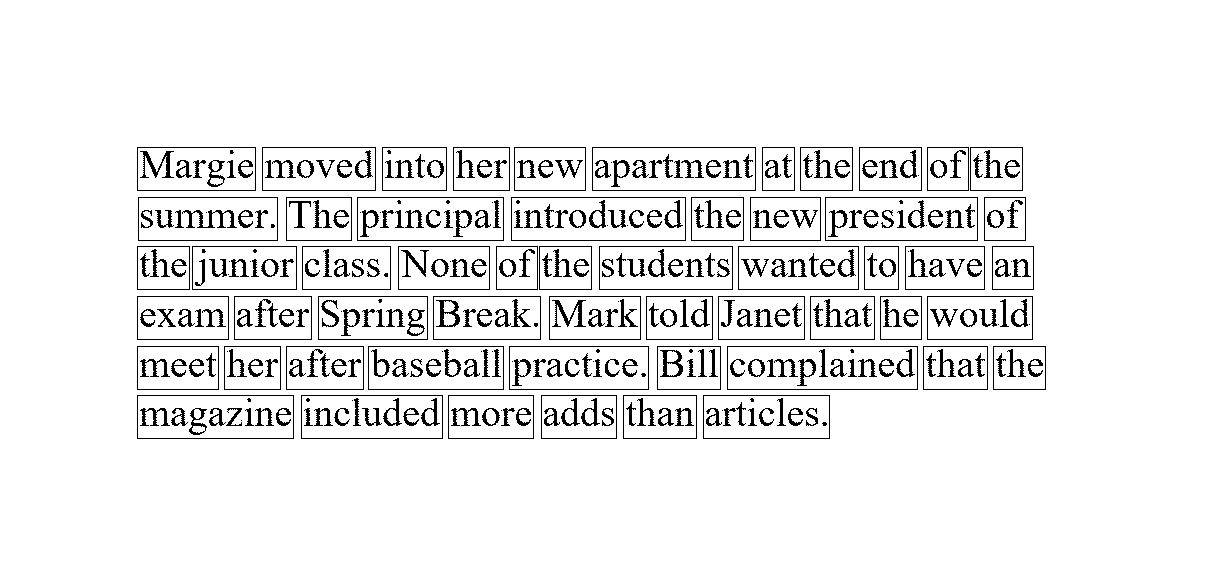

In [5]:
# finally, a visualization of the areas of interest (AOIs) around words!

EMTK.draw_aoi(aoi, image, image_path)

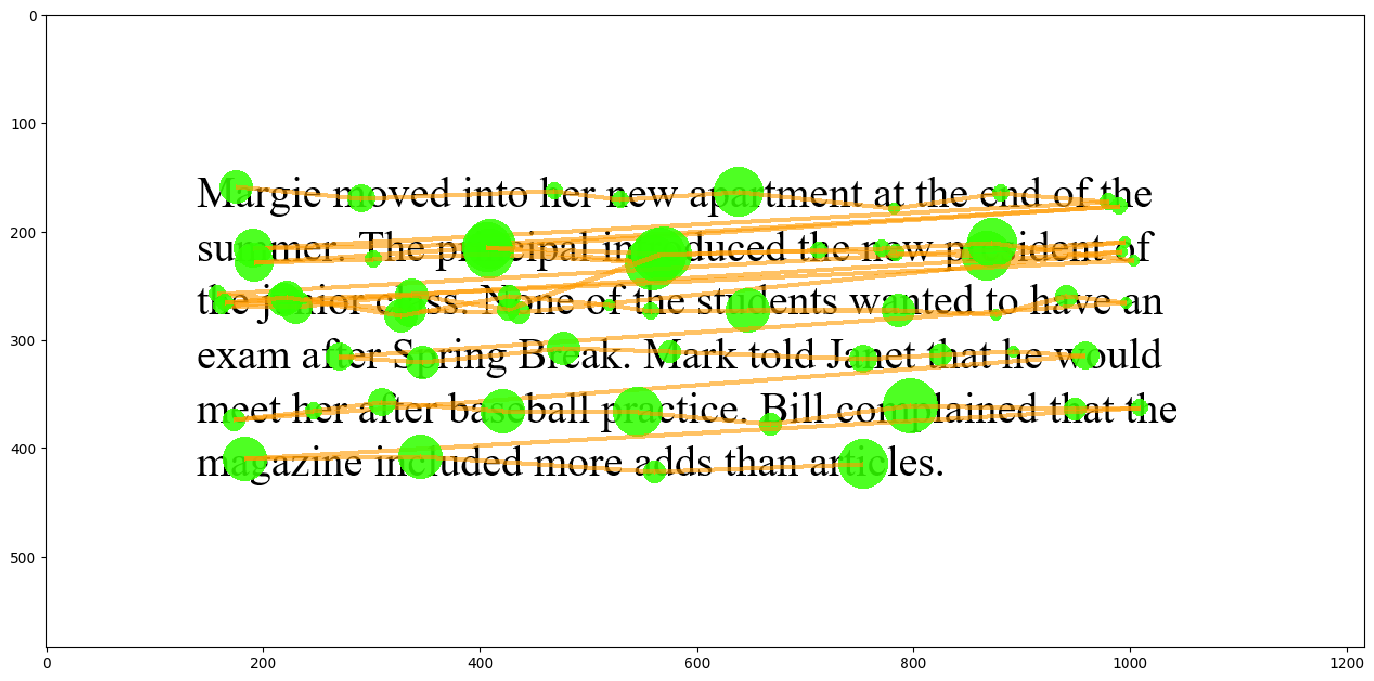

In [6]:
# this is the file you will work on a lot this project

import correction

# generating a synthetic trial
synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)

# drawing the synthetic data!
correction.draw_fixation('synthetic_text.png', synth_fixations)

# Generating a synthetic dataset with 100 readers:

Look at that, we did something cool!  Now that we know how to generate a single snythetic trial, let's generate 100 and store them in a text file called "synthetic_dataset_with_time.txt" in json format.  I will guide you through the steps using the comments!

In [7]:
data = {}

# loop 100 times maintaining a variable called index
for index in range(100):
    
    # generate a synthetic trial using similar code to the one above
    synth_fixation = correction.generate_fixations_left_skip_regression(aois_with_tokens)

    # store the trial in the dictionary called "data" where the key is "robot" + str(index)
    data['robot' + str(index)] = synth_fixation
    


In [8]:
# check that the data looks correct

data["robot1"]

[[181.16666666666666, 176.0, 300],
 [301.5, 166.0, 250],
 [402.1666666666667, 163.0, 200],
 [646.1666666666666, 165.0, 450],
 [776.5, 167.0, 100],
 [882.5, 160.0, 150],
 [935.5, 174.0, 100],
 [187.16666666666666, 217.0, 350],
 [304.5, 217.0, 150],
 [399.5, 225.0, 450],
 [567.8333333333334, 218.0, 500],
 [713.1666666666666, 212.0, 150],
 [777.1666666666666, 226.0, 150],
 [878.5, 224.0, 450],
 [995.5, 217.0, 100],
 [219.5, 273.0, 300],
 [336.1666666666667, 277.0, 300],
 [434.1666666666667, 263.0, 200],
 [513.5, 274.0, 100],
 [563.1666666666666, 261.0, 150],
 [641.1666666666666, 265.0, 400],
 [771.8333333333334, 278.0, 300],
 [938.1666666666666, 273.0, 200],
 [997.5, 271.0, 100],
 [1000.5, 272.0, 100],
 [637.1666666666666, 274.0, 400],
 [776.8333333333334, 275.0, 300],
 [938.1666666666666, 259.0, 200],
 [1003.5, 265.0, 100],
 [250.5, 323.0, 250],
 [347.1666666666667, 323.0, 300],
 [475.5, 323.0, 300],
 [676.8333333333334, 322.0, 200],
 [749.5, 322.0, 250],
 [836.1666666666666, 311.0, 200]

In [9]:
import json
# convert data into json format, then store it in a text file called "synthetic_dataset_with_time.txt"

f = open('synthetic_dataset_with_time.txt', 'w')
f.write(json.dumps(data))
f.close()

That should be it, don't overthink it!  You did great by the way, I can see you, its one of my supernatural abilities.